In [30]:
#Busqueda de cuadricula para clasificación en un modelo de regresión lineal
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #la exactitud del algoritmo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV

In [31]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/espin/Downloads/diabetes_indiana.csv", sep=',', low_memory=False)


In [32]:
datos

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
print(datos.head())

   Unnamed: 0  0    1   2   3    4     5      6   7  8
0           0  6  148  72  35    0  33.6  0.627  50  1
1           1  1   85  66  29    0  26.6  0.351  31  0
2           2  8  183  64   0    0  23.3  0.672  32  1
3           3  1   89  66  23   94  28.1  0.167  21  0
4           4  0  137  40  35  168  43.1  2.288  33  1


In [60]:
data = datos.values

In [61]:
# Separar las características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1]  # Todas las columnas excepto la última
y = datos.iloc[:, -1]   # La última columna

In [62]:
print(X.shape, y.shape)

(768, 9) (768,)


In [63]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Crear el modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

In [66]:
# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[119  32]
 [ 29  51]]


In [69]:
print("Precisión del modelo:")
print(accuracy_score(y_test, y_pred))

Precisión del modelo:
0.7359307359307359


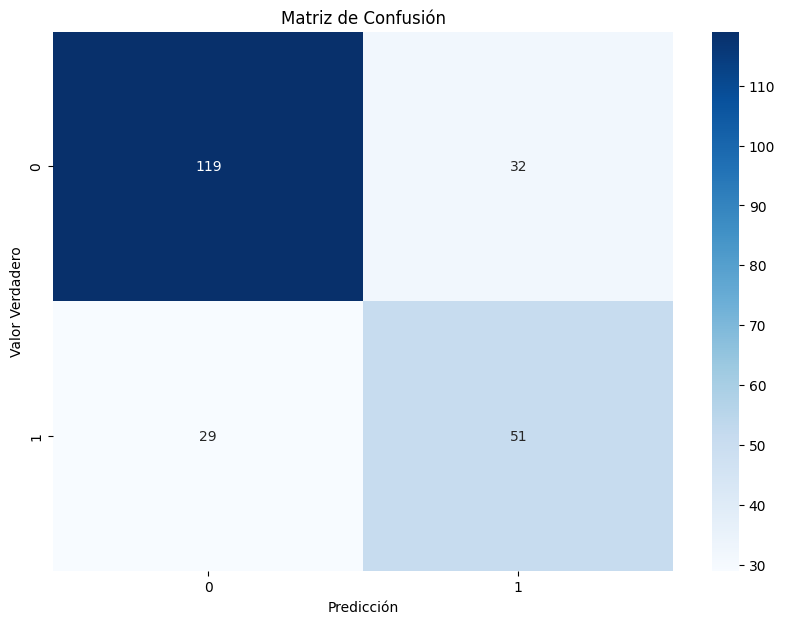

In [70]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [73]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4],     
    'bootstrap': [True, False]       
}

In [74]:
# Crear el modelo Random Forest
modelo = RandomForestClassifier(random_state=42)

In [77]:
# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [76]:
# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [52]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [53]:
# Usar el mejor modelo encontrado para hacer predicciones
best_rf = grid_search.best_estimator_

In [54]:
# Hacer predicciones en el conjunto de prueba
y_pred_optimized = best_rf.predict(X_test)

In [56]:
# Evaluar el modelo optimizado
print("Matriz de confusión (Modelo optimizado):")
print(confusion_matrix(y_test, y_pred_optimized))

Matriz de confusión (Modelo optimizado):
[[120  31]
 [ 27  53]]


In [59]:
print("\nInforme de clasificación (Modelo optimizado):")
print(classification_report(y_test, y_pred_optimized))


Informe de clasificación (Modelo optimizado):
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [58]:
print("\nPrecisión del modelo optimizado:")
print(accuracy_score(y_test, y_pred_optimized))


Precisión del modelo optimizado:
0.7489177489177489
